In [1]:
import matplotlib.pyplot as plt

rcParams_dict = {
    # ---------- figure
    'figure.figsize': [8, 6],
    'figure.dpi': 120,
    'figure.facecolor': 'white',
    # ---------- axes
    'axes.grid': True,
    'axes.linewidth': 1.5,
    # ---------- ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 8.0,
    'ytick.major.size': 8.0,
    # ---------- lines
    'lines.linewidth': 2.5,
    'lines.markersize': 12,
    # ---------- grid
    'grid.linestyle': ':',
    # ---------- font
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'cm',
    #'mathtext.fontset': 'stix',
    'font.size': 20,
    'axes.labelsize': 26,
    'legend.fontsize': 26,
    'svg.fonttype': 'path',  # Embed characters as paths
    #'svg.fonttype': 'none',  # Assume fonts are installed on the machine
    'pdf.fonttype': 42,  # embed fonts in PDF using type42 (True type)
}

plt.rcParams.update(rcParams_dict)

In [2]:
import numpy as np
from dscribe.descriptors import ValleOganov

# Setup
vo = ValleOganov(
    species=["H", "O"],
    function="distance",
    sigma=10**(-0.5),
    n=100,
    r_cut=5
)

[3.88252602e-05 8.15262170e-05 1.66888077e-04 3.33041591e-04
 6.47913187e-04 1.22879770e-03 2.27190003e-03 4.09490040e-03
 7.19519879e-03 1.23250195e-02 2.05815381e-02 3.35052965e-02
 5.31734153e-02 8.22661412e-02 1.24077549e-01 1.82436114e-01
 2.61501375e-01 3.65411923e-01 4.97779545e-01 6.61054084e-01
 8.55820272e-01 1.08012444e+00 1.32895622e+00 1.59401803e+00
 1.86389510e+00 2.12468913e+00 2.36110350e+00 2.55788116e+00
 2.70141564e+00 2.78130216e+00 2.79158369e+00 2.73148518e+00
 2.60551009e+00 2.42288267e+00 2.19643176e+00 1.94110375e+00
 1.67234347e+00 1.40458457e+00 1.15004804e+00 9.17972640e-01
 7.14313966e-01 5.41868843e-01 4.00723524e-01 2.88895712e-01
 2.03040622e-01 1.39113838e-01 9.29187311e-02 6.05036703e-02
 3.84065821e-02 2.37670380e-02 1.43380435e-02 8.43237926e-03
 4.83454649e-03 2.70213280e-03 1.47232249e-03 7.82067917e-04
 4.04977811e-04 2.04438734e-04 1.00609802e-04 4.82683571e-05
 2.25751068e-05 1.02930040e-05 4.57508799e-06 1.98244752e-06
 8.37430622e-07 3.448584

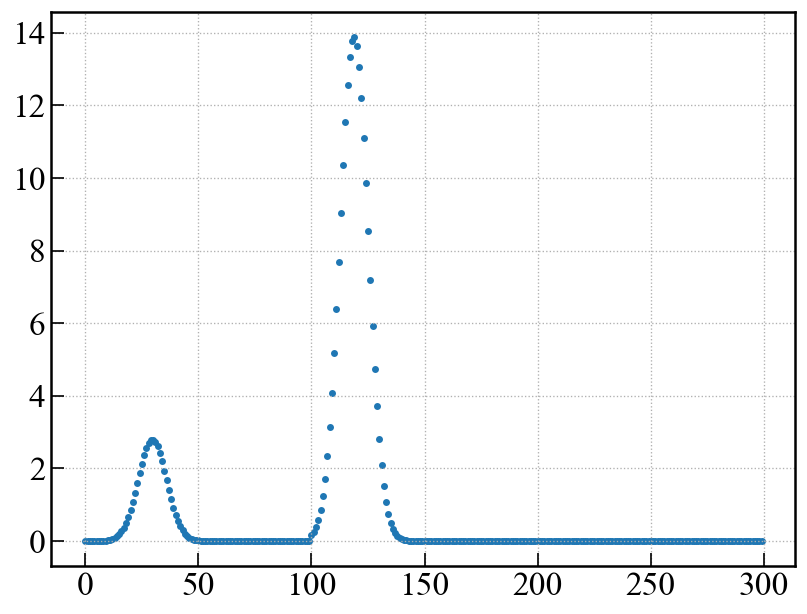

In [6]:
#[MBTR]
#原子番号や原子間距離を離散化グリッドを用いて滑らかな値にし、原子の組み合わせごとに並べた記述子
#[ValleOganov]
#MBTR記述子の値を2原子間距離と3原子の角度だけに設定したもの
from ase import Atoms
import math
water = Atoms(
    cell=[[5.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 5.0]],
    positions=[
        [0, 0, 0],
        [0.95, 0, 0],
        [
            0.95 * (1 + math.cos(76 / 180 * math.pi)),
            0.95 * math.sin(76 / 180 * math.pi),
            0.0,
        ],
    ],
    symbols=["H", "O", "H"],
)

# Create ValleOganov output for the system
vo_water = vo.create(water)

print(vo_water)
print(vo_water.shape)
plt.scatter(range(len(vo_water)), vo_water, s=10)
